In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathon-dataset/Copy-of-dataset_1_.csv


In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [14]:
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
file_path = '/kaggle/input/hackathon-dataset/Copy-of-dataset_1_.csv'
df = pd.read_csv(file_path)

# Display the head of the dataset
print("Head of the Dataset:")
print(df.head())

Head of the Dataset:
   CustomerID  AccountBalance   LastLogin  CustomerID.1           Name   Age  \
0      1001.0     9507.272060  2022-01-01        1001.0  Customer 1001  54.0   
1      1002.0     7408.704536  2022-01-02        1002.0  Customer 1002  35.0   
2      1003.0     1715.321989  2022-01-03        1003.0  Customer 1003  40.0   
3      1004.0     3101.509134  2022-01-04        1004.0  Customer 1004  30.0   
4      1005.0     5405.766914  2022-01-05        1005.0  Customer 1005  46.0   

        Address  TransactionID  FraudIndicator  CustomerID.2  ...  Category  \
0  Address 1001            1.0             0.0        1001.0  ...     Other   
1  Address 1002            2.0             0.0        1002.0  ...    Online   
2  Address 1003            3.0             0.0        1003.0  ...    Travel   
3  Address 1004            4.0             0.0        1004.0  ...    Travel   
4  Address 1005            5.0             0.0        1005.0  ...     Other   

   TransactionID.2 Tran

/tmp/ipykernel_42/617335274.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['FraudIndicator'] = df['FraudIndicator']


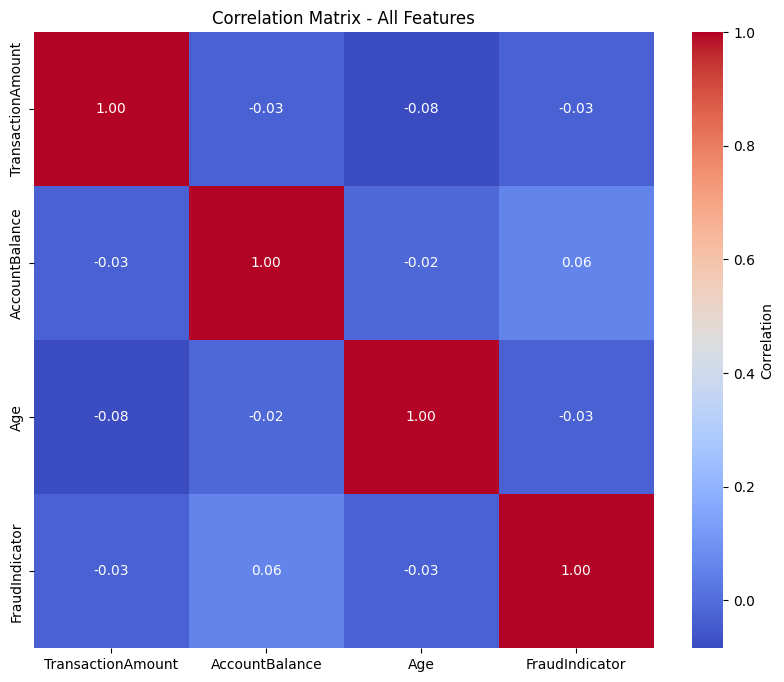

In [15]:
# Select relevant features
selected_features = ['TransactionAmount', 'AccountBalance',  'Age']
X_selected = df[selected_features]

# Add the target variable if available
if 'FraudIndicator' in df.columns:
    X_selected['FraudIndicator'] = df['FraudIndicator']

# Plot correlation matrix for all features
plt.figure(figsize=(10, 8))
all_corr = X_selected.corr()
sns.heatmap(all_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - All Features')
plt.show()

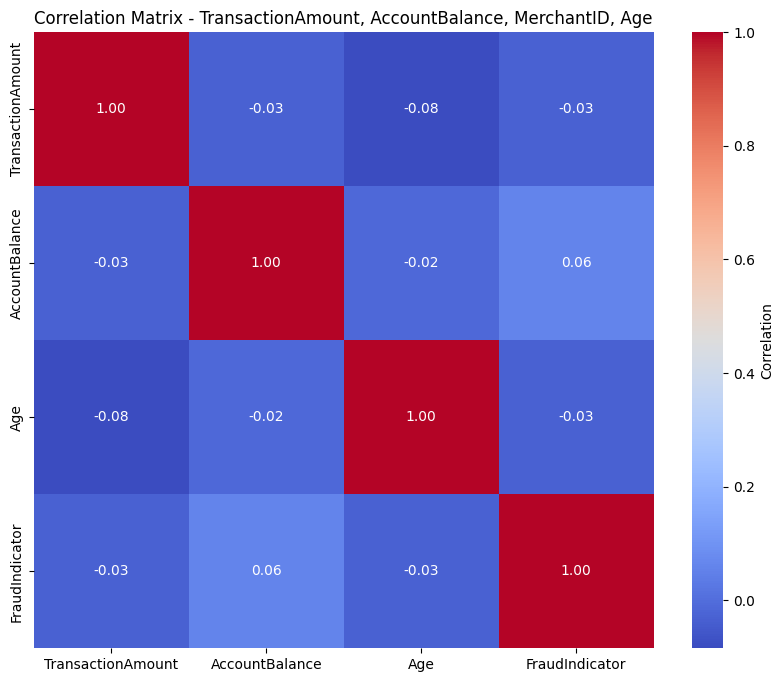

In [19]:

y_no_missing = df['FraudIndicator']

# Combination of three features
selected_features_df = X_selected.copy()
selected_features_df['FraudIndicator'] = y_no_missing

plt.figure(figsize=(10, 8))
three_feature_corr = selected_features_df.corr()
sns.heatmap(three_feature_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - TransactionAmount, AccountBalance, MerchantID, Age')
plt.show()


In [ ]:

# Combination of three features
selected_features_df = X_selected.copy()
selected_features_df['FraudIndicator'] = y_no_missing

plt.figure(figsize=(10, 8))
three_feature_corr = selected_features_df.corr()
sns.heatmap(three_feature_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - TransactionAmount, AccountBalance, MerchantID, Age')
plt.show()
